In [ ]:
#import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [ ]:
#reading the data and creating a dataframe, setting date as Index(axis=0)
data = pd.read_csv('/content/2021_2022.csv', index_col='Date', parse_dates=True,dayfirst=True)

In [ ]:
#display data
data.head()

,NO2,CO,PM2.5,PM10,AQI_Value
Date,,,,,
2021-01-01,NaN,NaN,NaN,NaN,99
2021-01-02,NaN,NaN,NaN,NaN,94
2021-01-03,NaN,NaN,NaN,NaN,72
2021-01-04,NaN,NaN,NaN,NaN,59
2021-01-05,NaN,NaN,NaN,NaN,39


In [ ]:
print(data.AQI_Value)

Date
2021-01-01    99
2021-01-02    94
2021-01-03    72
2021-01-04    59
2021-01-05    39
              ..
2022-12-27    45
2022-12-28    40
2022-12-29    76
2022-12-30    64
2022-12-31    43
Name: AQI_Value, Length: 730, dtype: int64


<Axes: xlabel='Date'>

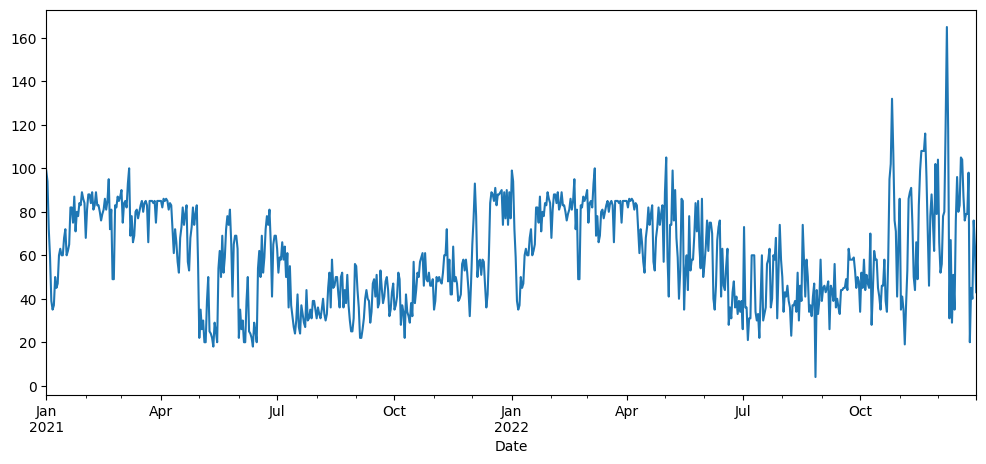

In [ ]:
#visualize the dataset
data['AQI_Value'].plot(figsize=(12,5))
plt.xlabel('Date')
plt.ylabel('AQI VALUES')

In [ ]:
#dropping unwanted attreibutes
data=data.drop( ['NO2','CO','PM2.5','PM10'], axis=1)
data.head()

,AQI_Value
Date,
2021-01-01,99
2021-01-02,94
2021-01-03,72
2021-01-04,59
2021-01-05,39


In [ ]:
#performing adf test to test stationarity
from statsmodels.tsa.stattools import adfuller
def adf_test(data):
     dftest = adfuller(data, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
adf_test(data['AQI_Value'])

1. ADF :  -3.042074787630772
2. P-Value :  0.031147620525677818
3. Num Of Lags :  15
4. Num Of Observations Used For ADF Regression: 714
5. Critical Values :
	 1% :  -3.4395418285955563
	 5% :  -2.865596454500293
	 10% :  -2.5689301318958955


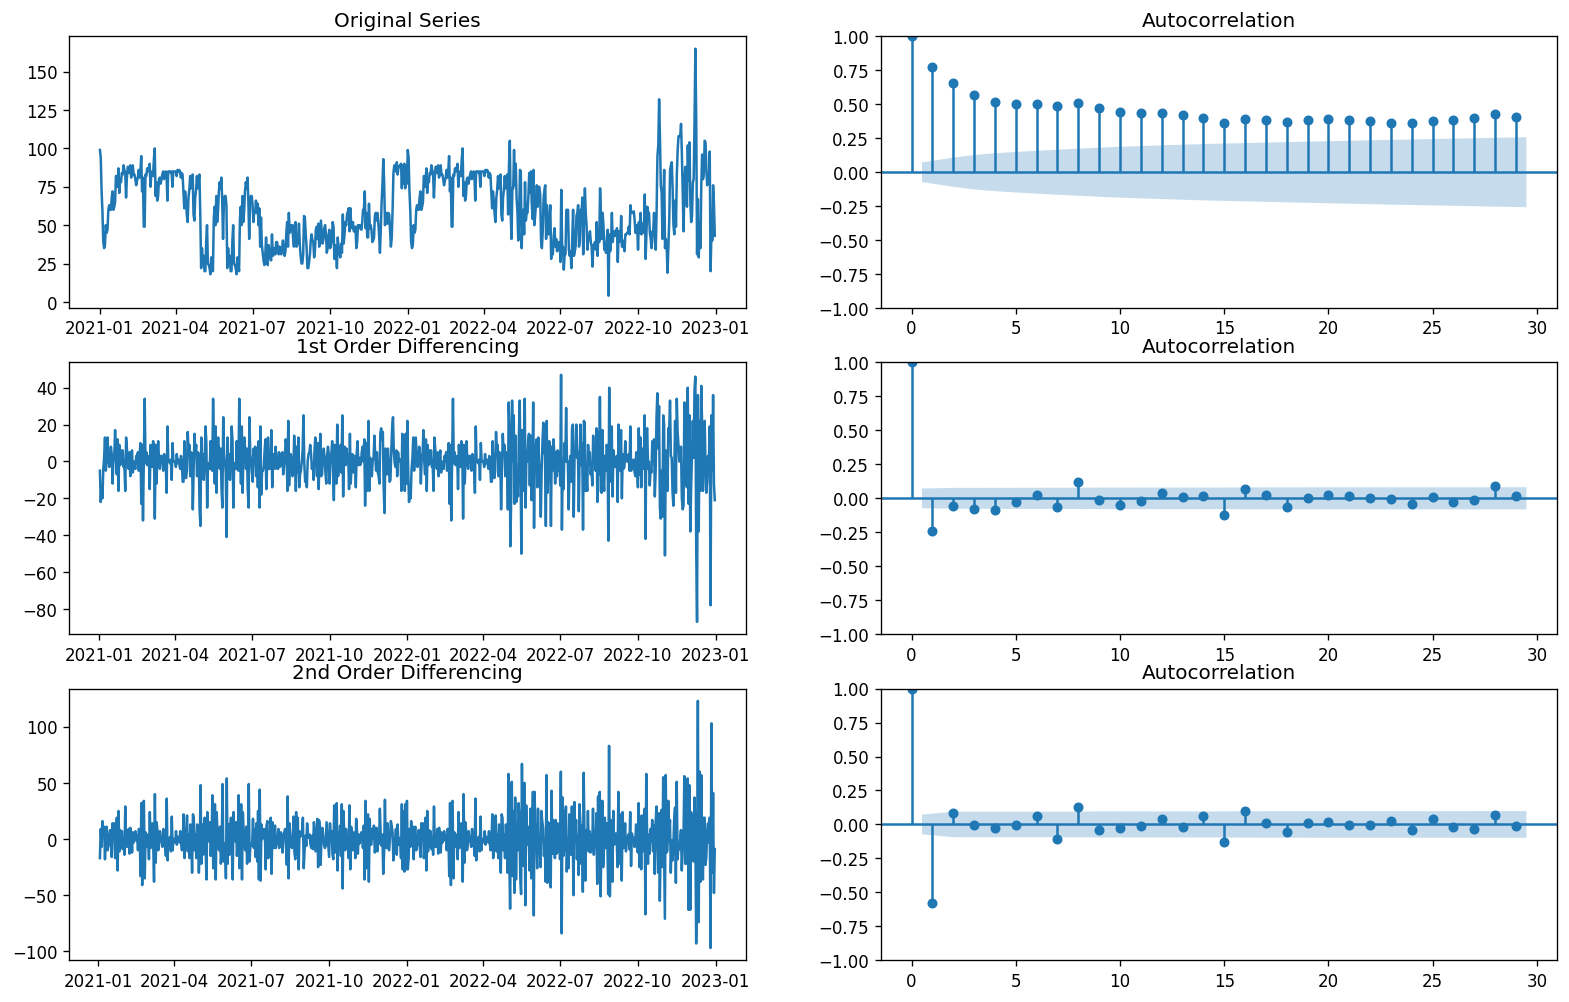

In [ ]:
#determining 'd' - differencing term
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(16,10), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(3, 2, sharex=False)
axes[0, 0].plot(data.AQI_Value); axes[0, 0].set_title('Original Series')
plot_acf(data.AQI_Value, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(data.AQI_Value.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(data.AQI_Value.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(data.AQI_Value.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(data.AQI_Value.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

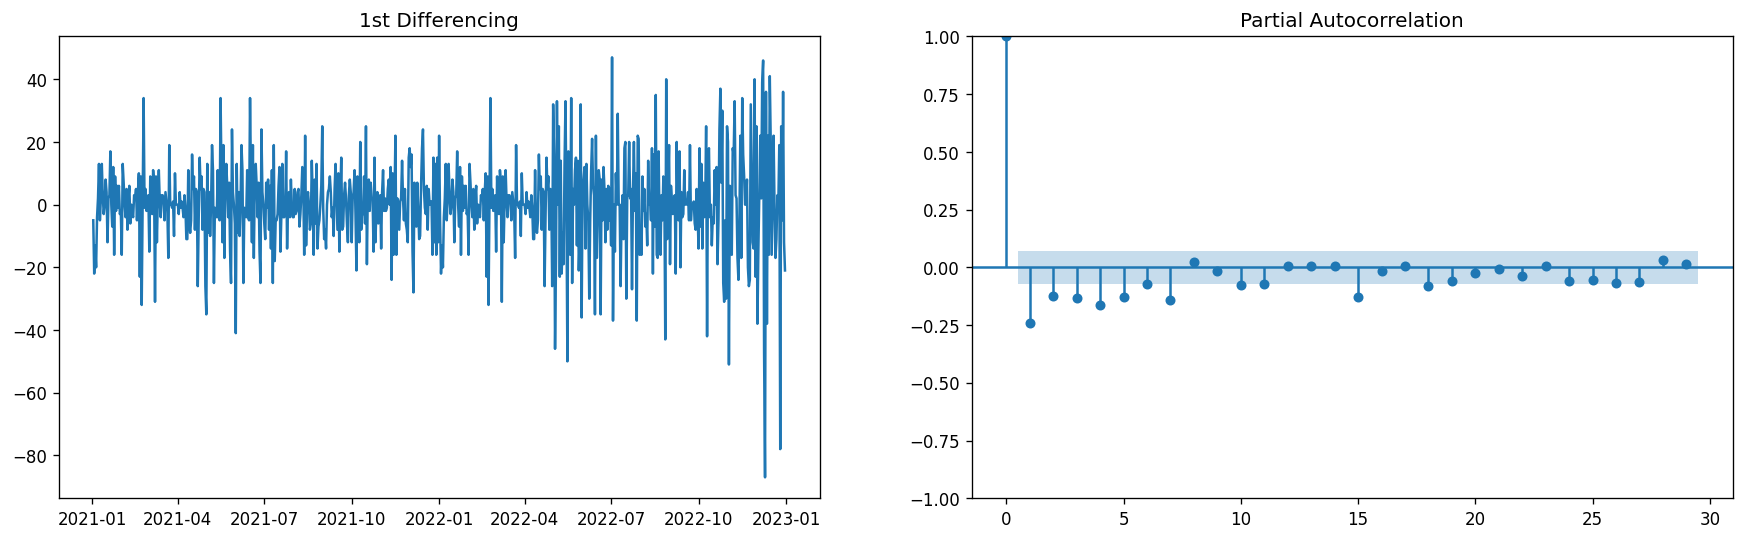

In [ ]:
#determining 'p' term - AR term
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(18,5), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=False)
axes[0].plot(data.AQI_Value.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(data.AQI_Value.diff().dropna(), ax=axes[1])

plt.show()

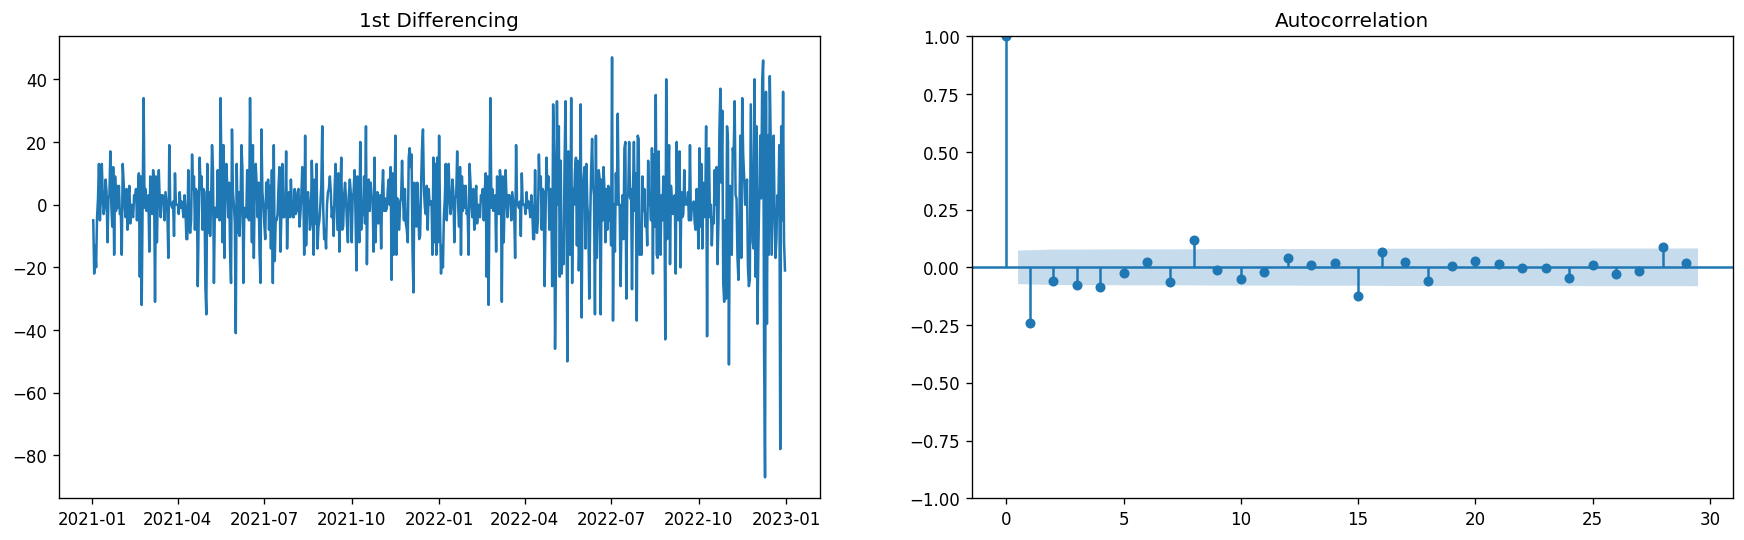

In [ ]:
#determining 'q' term - MA term
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(18,5), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=False)
axes[0].plot(data.AQI_Value.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(data.AQI_Value.diff().dropna(), ax=axes[1])

plt.show()

In [ ]:
#splitting into test and train data

print(data.shape)
df_train=data.iloc[:-146]
df_test=data.iloc[-146:]
print(df_train.shape,df_test.shape)

(730, 1)
(584, 1) (146, 1)


In [ ]:
!pip install pyramid-arima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 515.6/515.6 kB 8.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pyramid-arima
  Running setup.py clean for pyramid-arima
Failed to build pyramid-arima
ERROR: Could not build wheels for pyramid-arima, which is required to install pyproject.toml-based projects


In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 24.2 MB/s eta 0:00:00


In [ ]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(data,trace=True,suppress_warnings=True, seasonal=True, m=1,D=1)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=5877.028, Time=2.22 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6000.306, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5957.926, Time=0.20 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5940.238, Time=0.29 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5998.326, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=5876.819, Time=1.40 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=5910.966, Time=0.78 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5875.866, Time=0.98 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=5876.654, Time=1.55 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=5948.239, Time=0.54 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=5873.869, Time=0.33 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=5938.269, Time=0.20 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=5955.953, Time=0.14 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=5874.657, Time=0.90 sec
 ARIMA(1,1,2)(0,0,0)[0]          

In [ ]:
#Model Train and test - auto arima
model=ARIMA(data,order=(1,1,1),trend='t')
modela=model.fit()
modela.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              AQI_Value   No. Observations:                  730
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2933.933
Date:                Wed, 01 Nov 2023   AIC                           5875.866
Time:                        14:47:27   BIC                           5894.233
Sample:                    01-01-2021   HQIC                          5882.953
                         - 12-31-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0039      0.085     -0.046      0.963      -0.170       0.162
ar.L1          0.5641      0.033     16.870      0.000       0.499       0.630
ma.L1         -0.9300      0.016    -58.410      0.000      -0.961      -0.899
sigma2       183.1109      6.256     29.269      0.000     170.849     195.373
===================================================================================
Ljung-Box (L1) (Q):                   0.32   Jarque-Bera (JB):               318.74
Prob(Q):                              0.57   Prob(JB):                         0.00
Heteroskedasticity (H):               2.59   Skew:                            -0.42
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

584
729
2022-08-08    39.897076
2022-08-09    31.378711
2022-08-10    39.668517
2022-08-11    39.480017
2022-08-12    40.572999
                ...    
2022-12-27    42.333378
2022-12-28    56.621958
2022-12-29    52.636012
2022-12-30    74.578974
2022-12-31    67.067012
Freq: D, Name: ARIMA Predictions, Length: 146, dtype: float64


<Axes: >

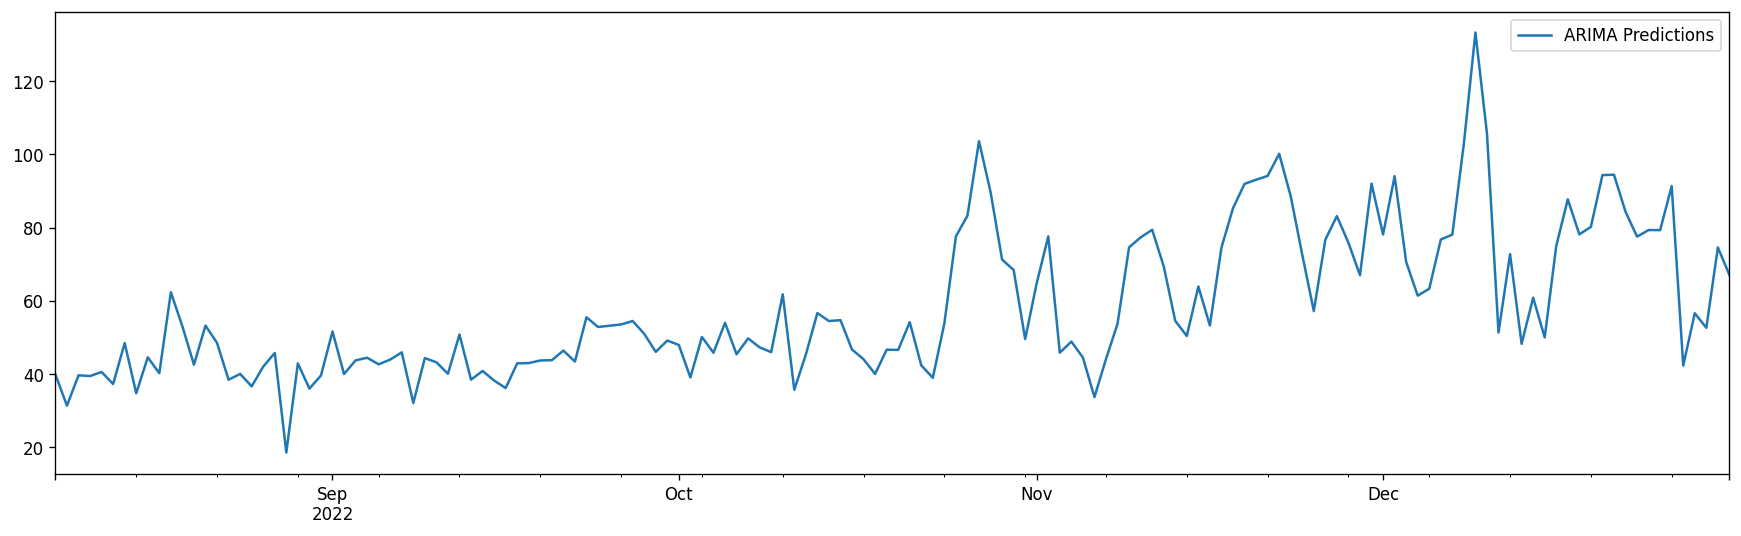

In [ ]:
#predictions Model auto arima
start=len(df_train)
end=len(df_train)+len(df_test)-1
print(start)
print(end)
preda=modela.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
print(preda)
preda.plot(legend=True)
plt.xlabel('Date')
plt.ylabel('AQI VALUES')

<Figure size 2400x450 with 0 Axes>

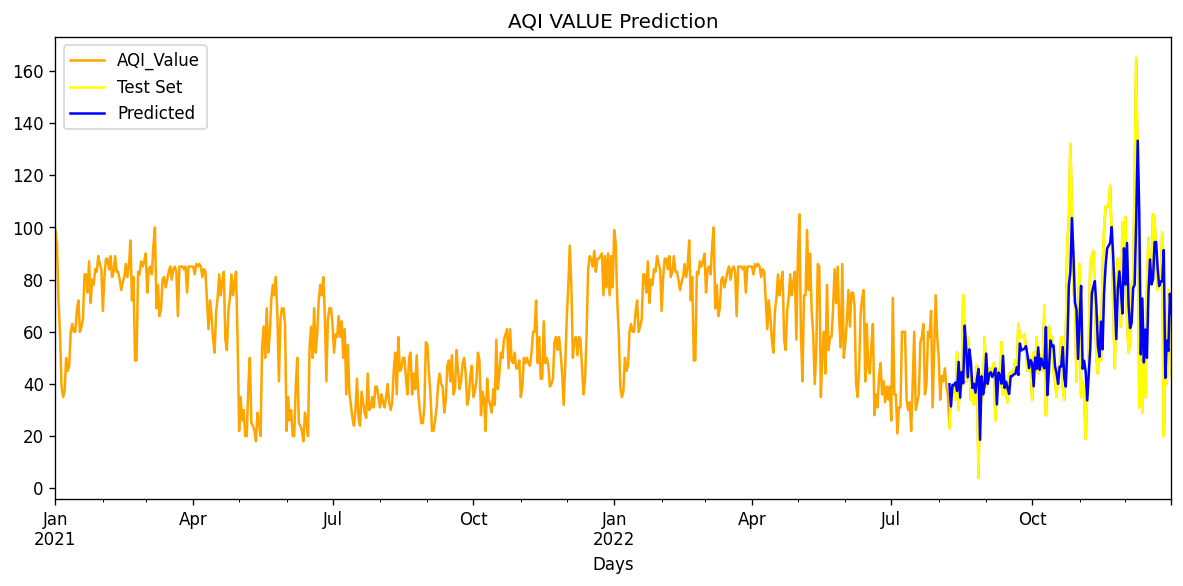

In [ ]:
#visualizing Model3
plt.figure(figsize=(16, 3), dpi=150)

# in plot method we set the label and color of the curve.
ax=data.plot(label='Train Set', color='orange',figsize=(12, 5))
df_test['AQI_Value'].plot(ax=ax,label='Test Set',color='yellow',figsize=(12,5))
preda.plot(ax=ax,label='Predicted',color='blue',figsize=(12, 5))

# adding title to the plot
plt.title('AQI VALUE Prediction')

# adding Label to the x-axis
plt.xlabel('Days')
plt.ylabel('AQI VALUES')
# adding legend to the curve
plt.legend()

In [ ]:
#Model evaluation 3
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from math import sqrt
expected=df_test['AQI_Value']
predictions=preda
mse = mean_squared_error(expected, predictions)
rmse = sqrt(mse)
print('RMSE of model 3: %f' % rmse)
mape = mean_absolute_percentage_error(expected, predictions)
print('MAPE of model 3: %f' % mape)
mae = mean_absolute_error(expected, predictions)
print('MAE of Model 3: %f' %mae)

RMSE of model 3: 19.325683
MAPE of model 3: 0.346775
MAE of Model 3: 14.085279
